In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Amber benchmark CAMI II marine pooled

* Source: https://usegalaxy.eu/u/paulzierep/h/copy-of-fairymags-taxonomic-binning-evaluation-pooled

                   Tool  accuracy_bp  accuracy_seq  adjusted_rand_index_bp  \
Sample                                                                       
sample_0  Gold standard     1.000000      1.000000                1.000000   
sample_0  MetaBat2_GTDB     0.365498      0.032944                0.142498   
sample_0   CONCOCT_GTDB     0.296072      0.059741                0.261203   
sample_0   SemiBin_GTDB     0.520735      0.041042                0.817605   
sample_0  DAS Tool_GTDB     0.427787      0.027814                0.929905   

          adjusted_rand_index_seq binning type  f1_score_bp  \
Sample                                                        
sample_0                 1.000000       genome     1.000000   
sample_0                 0.066568       genome     0.595979   
sample_0                 0.122751       genome     0.607643   
sample_0                 0.712103       genome     0.521237   
sample_0                 0.749912       genome     0.541594   

          f

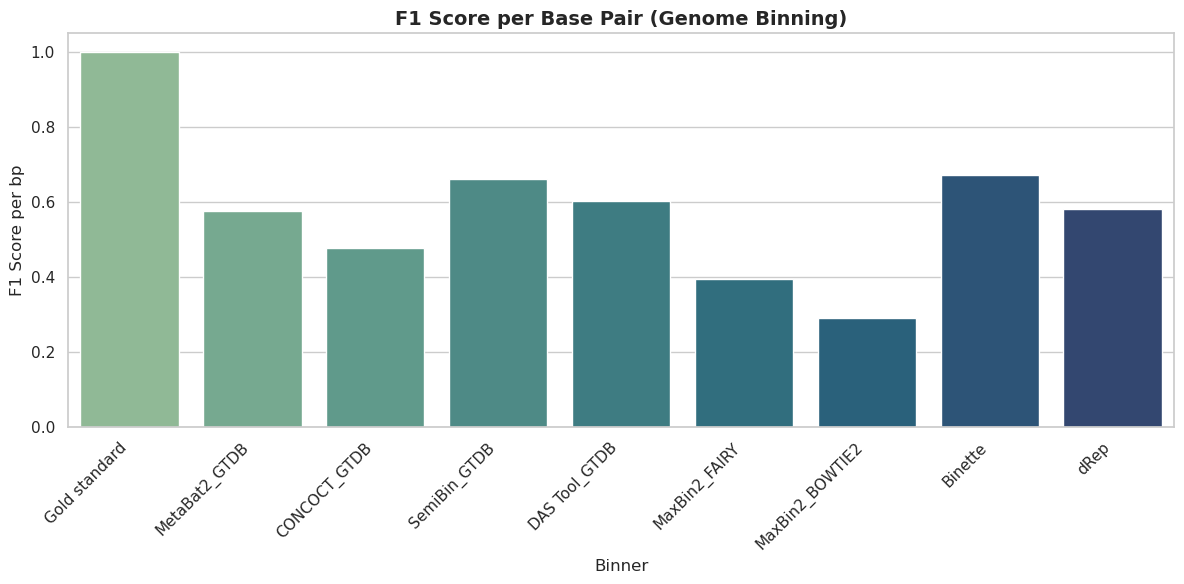

In [20]:

# URL to the TSV file
amber_results = "https://usegalaxy.eu/api/datasets/4838ba20a6d8676540e8ec86698e2f53/display?to_ext=tabular"

# Load TSV data
df = pd.read_csv(amber_results, sep='\t', index_col="Sample")
print(df.head())

# # Filter for genome binning type
df_genome = df[df['binning type'] == 'genome']

# Set Seaborn theme
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_genome,
    x='Tool',
    y='f1_score_per_bp',
    palette='crest'
)

# Customize plot
ax.set_title('F1 Score per Base Pair (Genome Binning)', fontsize=14, weight='bold')
ax.set_xlabel('Binner', fontsize=12)
ax.set_ylabel('F1 Score per bp', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


# Cami II marine

* Source: https://usegalaxy.eu/u/paulzierep/h/mags-individual-workflow-cami-ii-marine-dataset

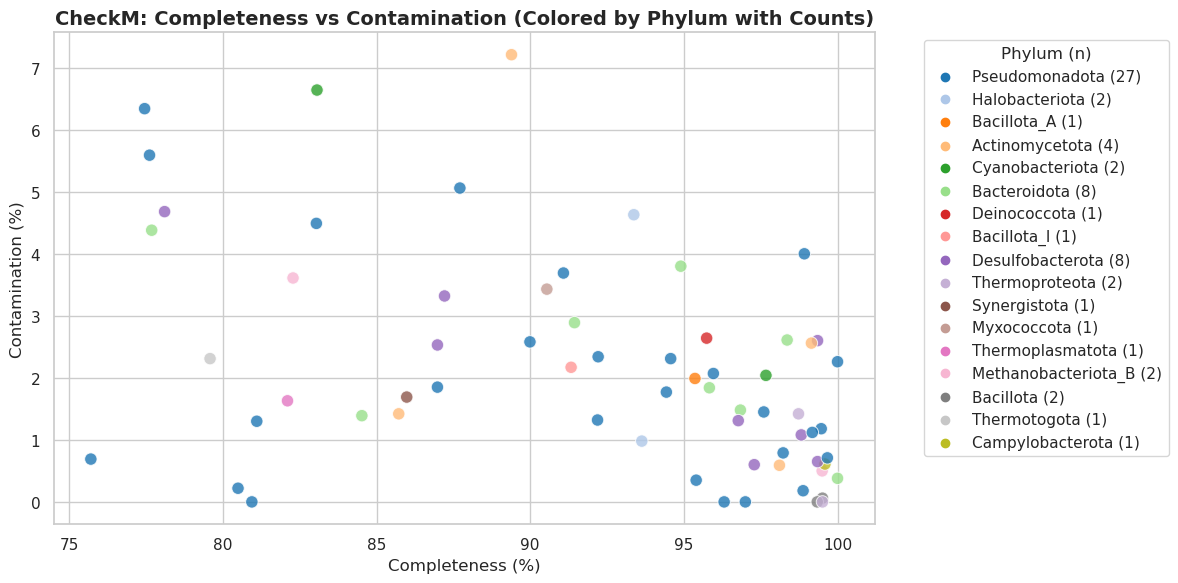

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- URLs to the TSV files ----
checkm_results = "https://usegalaxy.eu/api/datasets/4838ba20a6d8676580958701afa6c026/display?to_ext=tabular"
gtdb_results_ar = "https://usegalaxy.eu/api/datasets/4838ba20a6d86765209d6215ad7ef1ea/display?to_ext=tsv"
gtdb_results_bac = "https://usegalaxy.eu/api/datasets/4838ba20a6d86765752584718e899bc9/display?to_ext=tsv"

# ---- Load datasets with index ----
checkm_df = pd.read_csv(checkm_results, sep='\t', index_col="Bin Id")
gtdb_ar = pd.read_csv(gtdb_results_ar, sep='\t', index_col="user_genome")
gtdb_bac = pd.read_csv(gtdb_results_bac, sep='\t', index_col="user_genome")

# ---- Fix CheckM index to match GTDB style ----
checkm_df.index = checkm_df.index.str.replace('.', '_', regex=False)

# ---- Combine archaeal and bacterial GTDB results ----
gtdb_df = pd.concat([gtdb_ar, gtdb_bac], ignore_index=False)

# ---- Extract phylum from classification column ----
def extract_phylum(classification):
    try:
        return next(x for x in classification.split(';') if x.startswith('p__')).replace('p__', '').strip()
    except StopIteration:
        return None

gtdb_df['Phylum'] = gtdb_df['classification'].apply(extract_phylum)

# ---- Join GTDB phylum into CheckM based on index ----
merged_df = checkm_df.join(gtdb_df[['Phylum']])

# ---- Create a "Phylum (n)" column for labeling ----
phylum_counts = merged_df['Phylum'].value_counts()
merged_df['Phylum (n)'] = merged_df['Phylum'].map(lambda p: f"{p} ({phylum_counts[p]})" if pd.notnull(p) else "Unknown")

# ---- Plot: Completeness vs Contamination with counts in legend ----
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=merged_df,
    y='Contamination',
    x='Completeness',
    hue='Phylum (n)',
    palette='tab20',
    s=80,
    alpha=0.8
)

plt.title('CheckM: Completeness vs Contamination (Colored by Phylum)', fontsize=14, weight='bold')
plt.ylabel('Contamination (%)')
plt.xlabel('Completeness (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Phylum (n)')
plt.tight_layout()
plt.show()
